In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


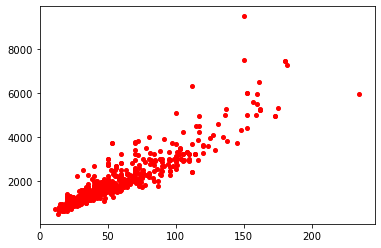

In [5]:

# On charge le dataset
house_data = pd.read_csv('house.csv')
house_data = house_data[house_data['loyer'] < 10000]
# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()


In [6]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


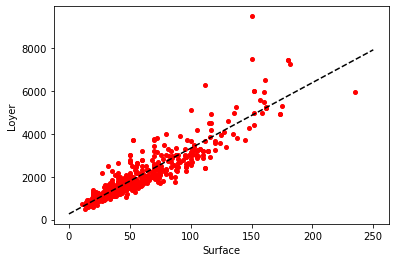

In [7]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

In [52]:

theta.item(0) + theta.item(1) * 35

1339.5964615602243

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
%timeit regr.predict(X)

89.1 µs ± 8.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
# prendre un tabléau de 1000 valeur et en utiliser 100 
house_data = np.random.randint(1000, size=1000)
data_size = len(house_data)
sample = np.random.randint(data_size, size=int(data_size*0.1) )
house_data[sample]

array([546, 789, 377, 690, 745, 158, 979, 749, 924, 324, 789,  26, 415,
       963, 354, 838, 459, 998, 381, 101, 845, 608, 302, 528, 149, 170,
       885, 357, 153, 151, 338, 138, 785, 650, 981, 199, 170, 665, 534,
       781,  60, 754, 265, 569, 298, 854,  61, 767, 457, 956,  74, 949,
       336, 154, 488, 273, 283,  17, 220, 474, 274, 472,  21, 811, 279,
       147,   6, 569, 944, 960, 274, 471, 750, 514,  98, 631, 957, 827,
       995, 361, 572, 905, 557, 957, 274, 888, 344, 331,  63, 367, 962,
       252, 911, 238, 209, 114, 469,  57, 993, 276])

In [53]:
# séparer les donner de text et les donnée d'entrainement
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)